# Lab 3 - Bar Charts, Line Charts, and Scatter Plots

Welcome to Lab 3 !

Methods for implementing the **pandas** functions in this lab come from https://pandas.pydata.org/pandas-docs/stable/index.html

Methods for implementing the **matplotlib.pyplot** functions in this lab come from https://matplotlib.org/3.2.2/gallery/index.html

Helpful reference for slicing and indexing:
    
    1)https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/#pandas_select_rows_1
    
    2)https://pandas.pydata.org/pandas-docs/version/0.15.0/indexing.html

# Introduction

**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

**matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Up to this point, we have utilized some of **pandas** and **matplotlib's** basic functionality for simple operations. We will now take a look at some more of the methods available to us using **pandas** and **matplotlib.** 

Areas to cover include:
    
   1) Grouped and Stacked Bar charts and **`.filter()`**
   
   2) Line charts, **`.reset_index()`**, and **`.drop()`**
   
   3) Unemployment and **`.sort_values()`**
   
   4) Scatter plots, **`.dropna()`**, and **`.isna()`**
    
Run these cells below to import your modules and get started:

In [41]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 1. Grouped and Stacked Bar Charts

A **bar chart** depicts data values for a categorical variable, using rectangular bars having lengths proportional to category values. The chart is drawn using two axes: a category axis that displays the category names and a value axis that displays the counts.

The data set we will be working with contains data from police shootings from 2015 to 2020.

**NOTE:** This dataset can be found at: https://www.kaggle.com/ahsen1330/us-police-shootings?select=shootings.csv

In [42]:
shootings = pd.read_csv("shootings.csv")

print("This data set has ",shootings.shape[0], " rows and", shootings.shape[1], "columns.")

print(shootings.dtypes)

This data set has  4895  rows and 15 columns.
id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object


Let's go ahead and sample the data three times to see what kind of results we get.

In [43]:
first_sample = shootings.sample(n=3)

first_sample

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2764,3240,Evilio Gomez,2017-12-24,shot,machete,46.0,M,Hispanic,Progreso,TX,False,other,Not fleeing,False,Sharp objects
2153,2502,Charles Shands,2017-04-14,shot,gun,33.0,M,White,Spanaway,WA,True,other,Car,False,Guns
4239,5030,Alvaro Duran Venegas,2019-09-12,shot,piece of wood,35.0,M,Hispanic,Santa Clarita,CA,False,attack,Not fleeing,False,Other unusual objects


In [44]:
second_sample = shootings.sample(n=3)

second_sample

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
392,500,Ebin Lamont Proctor,2015-05-30,shot,unarmed,19.0,M,White,Cottonwood,AZ,False,attack,Foot,False,Unarmed
3891,4615,Donnell James Lang,2019-04-02,shot,unarmed,48.0,M,White,Redding,CA,True,attack,Not fleeing,False,Unarmed
506,635,Matthew Ryan Graham,2015-07-13,shot,gun,24.0,M,White,Dunsmuir,CA,False,attack,Car,False,Guns


In [45]:
third_sample = shootings.sample(n=3)

third_sample

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3090,3610,Rumondale Jones,2018-04-12,shot,knife,39.0,M,Black,Helena-West Helena,AR,False,attack,Not fleeing,False,Sharp objects
865,1028,Henry Reyna,2015-11-23,shot and Tasered,knife,49.0,M,Hispanic,Corpus Christi,TX,False,other,Not fleeing,True,Sharp objects
3600,4272,Jarvis Randall,2018-12-01,shot,straight edge razor,30.0,M,Black,Tamarac,FL,True,attack,Not fleeing,False,Sharp objects


Let's create a bar chart displaying how many people who were killed had signs of mental illness.

Let's first start by creating a sub-table containing 'id,' 'name,' 'gender,' 'race,' and 'sign_of_mental_illness.'

We can do this using the **`.filter()`** method in the cell below

In [46]:
sub_table = shootings.filter(items = ['id', 'name','gender','race','signs_of_mental_illness'])

print(sub_table.shape)
print()
print(sub_table.dtypes)


(4895, 5)

id                          int64
name                       object
gender                     object
race                       object
signs_of_mental_illness      bool
dtype: object


Now lets create arrays for the signs of mental illness. We will have an array for men  who did and didn't show signs of mental illness, as well as for women containing who did and didn't show signs of mental illness. We can "filter" through the dataframe(table) easily using the syntax below.

Then, we will create a visual with the **`plt.bar`** fucntion

**NOTE:** This link can be used as a reference:  https://python-graph-gallery.com/11-grouped-barplot/

1034
3639
69
153


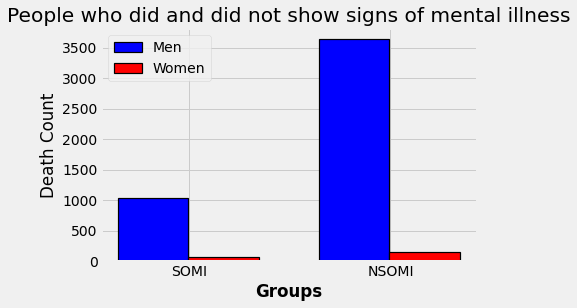

In [47]:
# This contains an array for all the men that showed signs of mental illness
Menbar1 = sub_table[(sub_table.gender == 'M') & (sub_table.signs_of_mental_illness == True)]
# This contains an array for all the men that did not show signs of mental illness
Menbar2 = sub_table[(sub_table.gender == 'M') & (sub_table.signs_of_mental_illness == False)]
# This contains an array for all the women that showed signs of mental illness
Womenbar1 =sub_table[(sub_table.gender == 'F') & (sub_table.signs_of_mental_illness == True)]
# This contains an array for all the men that did not show signs of mental illness
Womenbar2 = sub_table[(sub_table.gender == 'F') & (sub_table.signs_of_mental_illness == False)]

# Bar variable for men and women that showed signs of mental illness

SOMI = [len(Menbar1), len(Menbar2)] # SOMI - 'Signs of Mental Illness'

# Bar varibale for men and women that did not show signs of mental illness

NSOMI = [len(Womenbar1), len(Womenbar2)]  # NSOMI - 'No Signs of Mental Illness'
 

bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(SOMI))  # this variable contains the number of bar groups there will be, which is two
r2 = [x + bar_width for x in r1]

print(len(Menbar1))
print(len(Menbar2))
print(len(Womenbar1))
print(len(Womenbar2))

# Make the plot
plt.bar(r1, SOMI, color='blue', width=bar_width, edgecolor='black', linewidth = 1.2, label='Men')
plt.bar(r2, NSOMI, color='red', width=bar_width, edgecolor='black',linewidth =1.2, label='Women')

# Add xticks on the middle of the group bars
plt.xlabel('Groups', fontweight='bold')
plt.ylabel('Death Count')
plt.xticks([r + 0.18 for r in range(len(SOMI))], ['SOMI','NSOMI'])


# Create legend & Show graphic
plt.title("People who did and did not show signs of mental illness")
plt.legend()
plt.show()




We can also turn the same data into a **stacked bar chart**. 

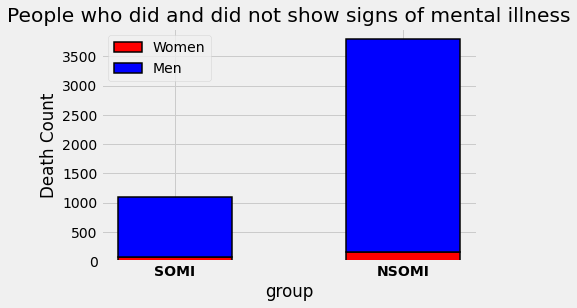

In [48]:
Menbar1 = len(sub_table[(sub_table.gender == 'M') & (sub_table.signs_of_mental_illness == True)])
Menbar2 = len(sub_table[(sub_table.gender == 'M') & (sub_table.signs_of_mental_illness == False)])
Womenbar1 = len(sub_table[(sub_table.gender == 'F') & (sub_table.signs_of_mental_illness == True)])
Womenbar2 = len(sub_table[(sub_table.gender == 'F') & (sub_table.signs_of_mental_illness == False)])

            
# Bar variable for men and women that showed signs of mental illness

SOMI = [Menbar1, Menbar2]

# Bar varibale for men and women that did not show signs of mental illness
NSOMI = [Womenbar1, Womenbar2]  

# Heights of bars1 + bars2
bars = np.add(SOMI, NSOMI).tolist()

# The position of the bars on the x-axis
r = [0,1]

bar_names = ['SOMI', 'NSOMI']

# Create the womens bars
plt.bar(r, NSOMI, color='red', edgecolor='black', width= 0.5, linewidth = 1.5, label = 'Women')
# Create mens bars (middle), on top of the first ones
plt.bar(r, SOMI, bottom=NSOMI, color='blue', edgecolor='black', linewidth = 1.5, width=0.5, label = 'Men')

# Custom X axis
plt.xticks(r, bar_names, fontweight='bold')
plt.xlabel("group")
plt.ylabel("Death Count")
 
# Show graphic
plt.title("People who did and did not show signs of mental illness")
plt.legend()
plt.show()








**Question:** Create a stacked bar chart displaying the total value of people who showed "Signs of Mental Illness" (SOMI) mental illness stacked on the number of men who showed SOMI. Do the same for women.

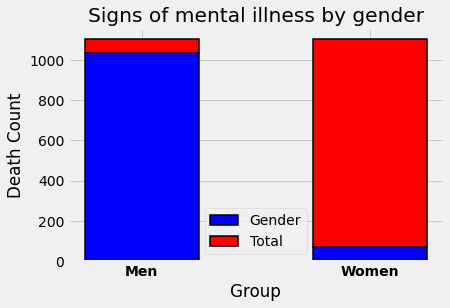

In [49]:
Menbar1 = len(sub_table[(sub_table.gender == 'M') & (sub_table.signs_of_mental_illness == True)])
Womenbar1 = len(sub_table[(sub_table.gender == 'F') & (sub_table.signs_of_mental_illness == True)])
Peoplebar1 = len(sub_table[(sub_table.signs_of_mental_illness == True)])

# Bar variable for men and women that showed signs of mental illness
Gender_SOMI = [Menbar1, Womenbar1]

# Bar varibale for people that showed signs of mental illness

Total = Menbar1 + Womenbar1
People_SOMI = [Total - x for x in Gender_SOMI]

# Heights of bars1 + bars2
bars = np.add(Gender_SOMI, People_SOMI).tolist()

# The position of the bars on the x-axis
r = [0,1]

bar_names = ['Men', 'Women']

# Create the gender bars
plt.bar(r, Gender_SOMI, color='blue', edgecolor='black', width= 0.5, linewidth = 1.5, label = 'Gender')

#plt.bar(1, Gender_SOMI[1], color='red', edgecolor='black', width= 0.5, linewidth = 1.5, label = 'Women')
# Create total bars (middle), on top of the first ones
plt.bar(r, People_SOMI, bottom=Gender_SOMI, color='red', edgecolor='black', linewidth = 1.5, width=0.5, label = 'Total')

# Custom X axis
plt.xticks(r, bar_names, fontweight='bold')
plt.xlabel("Group")
plt.ylabel("Death Count")
 
# Show graphic
plt.title("Signs of mental illness by gender")
plt.legend()
plt.show()

**Question:** Create a grouped bar chart comparing the number of black men and white men grouped together, along with black women and white women grouped together.

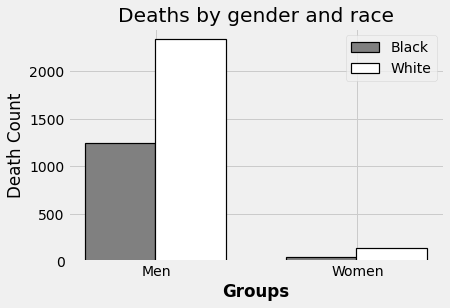

In [50]:
# This contains an array for all the black men
Menbar1 = sub_table[(sub_table.gender == 'M') & (sub_table.race == 'Black')]

# This contains an array for all the white men
Menbar2 = sub_table[(sub_table.gender == 'M') & (sub_table.race == 'White')]

# This contains an array for all the black women
Womenbar1 = sub_table[(sub_table.gender == 'F') & (sub_table.race == 'Black')]

# This contains an array for all the white women
Womenbar2 = sub_table[(sub_table.gender == 'F') & (sub_table.race == 'White')]

# Bar variable for black people 

Black = [len(Menbar1), len(Womenbar1)]

# Bar varibale for white people

White = [len(Menbar2), len(Womenbar2)]
 

bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(Black))  # this variable contains the number of bar groups there will be, which is two
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, Black, color='gray', width=bar_width, edgecolor='black', linewidth = 1.2, label='Black')
plt.bar(r2, White, color='white', width=bar_width, edgecolor='black',linewidth =1.2, label='White')

# Add xticks on the middle of the group bars
plt.xlabel('Groups', fontweight='bold')
plt.ylabel('Death Count')
plt.xticks([r + 0.18 for r in range(len(Black))], ['Men','Women'])


# Create legend & Show graphic
plt.title("Deaths by gender and race")
plt.legend()
plt.show()


# 2. Line Charts

A **line chart** (or **line graph**) depicts data trends by using straight lines to connect successive data points in a scatter plot. The straight lines show the general direction that data changes over time. Because trends involve time, line charts commonly use a time metric for the horizontal axis. 

Let's work with data set on unemployment in all counties of America from 1990 - 2016. 

**NOTE:** This data set can be found at: https://www.kaggle.com/jayrav13/unemployment-by-county-us?select=output.csv

In [51]:
county_unemployment = pd.read_csv("county_unemployment.csv")
print(county_unemployment.shape)

(885548, 5)


In [52]:
county_unemployment.dtypes

Year        int64
Month      object
State      object
County     object
Rate      float64
dtype: object

In [53]:
county_unemployment.sample(n=5)

,Year,Month,State,County,Rate
340324,1992,October,Colorado,El Paso County,6.5
158811,2010,September,Nebraska,Adams County,4.2
270319,1991,November,Nevada,Lyon County,6.5
160774,2010,April,Michigan,Bay County,12.0
711693,2006,March,Ohio,Putnam County,5.2


As you can see this is a very large data set. Let's work with a smaller data set with only the counties in the state of Maryland

In [54]:
md_unemployment = county_unemployment[county_unemployment.State == 'Maryland']
md_unemployment = md_unemployment.filter(items = ['Year','Month', "State", 'County', 'Rate'])
print(md_unemployment.shape)
print(md_unemployment.sample(n=7))

(7776, 5)
        Year     Month     State              County  Rate
137363  2010  February  Maryland      Harford County   8.6
868119  2009       May  Maryland      Garrett County   7.0
868124  2009       May  Maryland      Harford County   7.2
617464  2003   January  Maryland     Caroline County   5.4
795428  2004      July  Maryland      Garrett County   4.6
417547  1994      June  Maryland     Wicomico County   6.5
671183  2001  February  Maryland  Queen Annes County   3.6


This is much better. Now because each year has different rates of unemployment, let's compute the average rate of unemployment for each year and store them in a dictionary.

First, lets sort this dataset by the 'Year' column.

In [55]:
md_unemployment = md_unemployment.sort_values('Year', ascending = True)
md_unemployment

,Year,Month,State,County,Rate
287569,1990,June,Maryland,Cecil County,8.7
279127,1990,August,Maryland,Kent County,5.6
279128,1990,August,Maryland,Caroline County,3.6
279129,1990,August,Maryland,Somerset County,12.9
281927,1990,May,Maryland,Cecil County,9.1
...,...,...,...,...,...
77024,2016,August,Maryland,Caroline County,4.8
77023,2016,August,Maryland,Kent County,4.7
77022,2016,August,Maryland,Harford County,4.3
68475,2016,February,Maryland,Cecil County,5.9


Referencing the indexes of each row will get difficult if we leave them as they are. Let's reset the indexes to have them start from 0 up.

We can do this using the **`reset_index.()`** method in the cell below

In [56]:
md_unemployment = md_unemployment.reset_index()
md_unemployment

,index,Year,Month,State,County,Rate
0,287569,1990,June,Maryland,Cecil County,8.7
1,279127,1990,August,Maryland,Kent County,5.6
2,279128,1990,August,Maryland,Caroline County,3.6
3,279129,1990,August,Maryland,Somerset County,12.9
4,281927,1990,May,Maryland,Cecil County,9.1
...,...,...,...,...,...,...
7771,77024,2016,August,Maryland,Caroline County,4.8
7772,77023,2016,August,Maryland,Kent County,4.7
7773,77022,2016,August,Maryland,Harford County,4.3
7774,68475,2016,February,Maryland,Cecil County,5.9


Finally, let's get rid of the column 'index.'

We can do this using the **`drop.()`** method 

In [57]:
md_unemployment = md_unemployment.drop(columns = ['index'])
md_unemployment 

,Year,Month,State,County,Rate
0,1990,June,Maryland,Cecil County,8.7
1,1990,August,Maryland,Kent County,5.6
2,1990,August,Maryland,Caroline County,3.6
3,1990,August,Maryland,Somerset County,12.9
4,1990,May,Maryland,Cecil County,9.1
...,...,...,...,...,...
7771,2016,August,Maryland,Caroline County,4.8
7772,2016,August,Maryland,Kent County,4.7
7773,2016,August,Maryland,Harford County,4.3
7774,2016,February,Maryland,Cecil County,5.9


Suppose we are only interested in a certain county in Maryland during a certain year. We can write a statement that creates a subtable based on these certain conditions using the following syntax.

Run the cell below.

In [58]:
year = 1990
pgc_unemployment = md_unemployment[(md_unemployment.County == "Prince George's County") & (md_unemployment.Year == year)]
pgc_unemployment

,Year,Month,State,County,Rate
8,1990,May,Maryland,Prince George's County,3.2
19,1990,August,Maryland,Prince George's County,3.9
67,1990,January,Maryland,Prince George's County,2.8
87,1990,October,Maryland,Prince George's County,4.0
92,1990,February,Maryland,Prince George's County,2.7
140,1990,March,Maryland,Prince George's County,2.6
151,1990,July,Maryland,Prince George's County,3.6
179,1990,December,Maryland,Prince George's County,4.0
211,1990,November,Maryland,Prince George's County,4.2
225,1990,September,Maryland,Prince George's County,4.1


Finally, we write a function to get the averages for Prince George's County, and display it using a line chart.

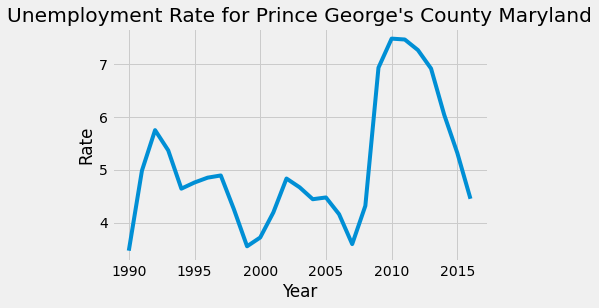

In [59]:
def get_averages(averages):
    year = 1990
    while year != 2017:
        pgc_unemployment = md_unemployment[(md_unemployment.County == "Prince George's County") & (md_unemployment.Year == year)]
        values = pgc_unemployment['Rate'].values # get values in a list
        avg_rate = sum(values) / len(values) # calculate the average
        averages[year] = avg_rate
        year += 1

aver_dict = {} # create a dictionary for the averages of MD unemployment over the years
get_averages(aver_dict)


Year = list(aver_dict.keys()) # get key for the year
Unemployment_Rate = list(aver_dict.values()) # get average rate for each year

plt.plot(Year, Unemployment_Rate)
plt.title("Unemployment Rate for Prince George's County Maryland")
plt.xlabel('Year')
plt.ylabel("Rate")
plt.show()

**Question:** Create a line chart that shows the unemployment for **all counties** in Maryland from 1990 to 2016. Use the `md_unemployment` data set.

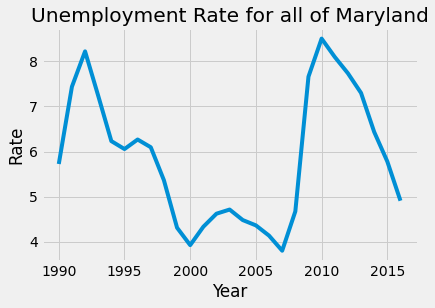

In [60]:
def get_averages(averages):
    year = 1990
    while year != 2017:
        pgc_unemployment = md_unemployment[(md_unemployment.Year == year)]
        values = pgc_unemployment['Rate'].values # get values in a list
        avg_rate = sum(values) / len(values) # calculate the average
        averages[year] = avg_rate
        year += 1

aver_dict = {} # create a dictionary for the averages of MD unemployment over the years
get_averages(aver_dict)


Year = list(aver_dict.keys()) # get key for the year
Unemployment_Rate = list(aver_dict.values()) # get average rate for each year

plt.plot(Year, Unemployment_Rate)
plt.title("Unemployment Rate for all of Maryland")
plt.xlabel('Year')
plt.ylabel("Rate")
plt.show()

**Question:** Compare the line charts of Prince George's County and Maryland to one another. Are there similarities ? Are there differences ?
Fill your answer in below.

In [61]:
explanation1 = """Both graphs show similar trends, the unemployment rates rise and fall at the same time periods
                indicating PGC was affected in the same manner as the rest of Maryland within these periods."""
explanation1

'Both graphs show similar trends, the unemployment rates rise and fall at the same time periods\n                indicating PGC was affected in the same manner as the rest of Maryland within these periods.'

**Question:** Why do you suppose that the years between 2005 and 2010 saw a significant increase in the unemployment rate? Fill your answer in below.

In [62]:
explanation2 = """ This is probably an effect of the Great Recession that happened around this time frame. 
                   Lots of people were laid off from their jobs as businesses struggled to stay afloat and
                   the unemployment rates spiked as a result. """
explanation2

' This is probably an effect of the Great Recession that happened around this time frame. \n                   Lots of people were laid off from their jobs as businesses struggled to stay afloat and\n                   the unemployment rates spiked as a result. '

# 3. Unemployment

The Federal Reserve Bank of St. Louis publishes data about jobs in the US. Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

Among people who are able to work and are looking for a full-time job, the percentage who can't find a job. This is called the Non-Employment Index, or NEI.
Among people who are able to work and are looking for a full-time job, the percentage who can't find any job or are only working at a part-time job. The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER. (Economists are great at marketing.)

The source data can be found at this link.

**Question 1:** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [63]:
unemployment = pd.read_csv("unemployment.csv")
unemployment

,Date,NEI,NEI-PTER
0,1994-01-01,10.0974,11.1720
1,1994-04-01,9.6239,10.7883
2,1994-07-01,9.3276,10.4831
3,1994-10-01,9.1071,10.2361
4,1995-01-01,8.9693,10.1832
...,...,...,...
85,2015-04-01,8.8386,10.1483
86,2015-07-01,8.6847,9.9166
87,2015-10-01,8.6650,9.8385
88,2016-01-01,8.4330,9.6174


**Question 2:** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

Reference this article for help: https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

In [64]:
by_nei = unemployment.sort_values('NEI', ascending = True)
by_nei_pter = unemployment.sort_values('NEI-PTER', ascending = True)

**Question 3:** Create a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter.

In [65]:
greatest_nei = by_nei[-10:]
greatest_nei = greatest_nei.sort_values('NEI', ascending=False)
greatest_nei

,Date,NEI,NEI-PTER
63,2009-10-01,10.9698,12.8557
64,2010-01-01,10.9054,12.7311
62,2009-07-01,10.8089,12.7404
61,2009-04-01,10.7082,12.5497
65,2010-04-01,10.6597,12.5664
67,2010-10-01,10.5856,12.4329
66,2010-07-01,10.5521,12.3897
68,2011-01-01,10.5024,12.3017
70,2011-07-01,10.4856,12.2507
69,2011-04-01,10.4409,12.2470


**Question 4:** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [66]:
pter = [unemployment['NEI-PTER']-unemployment['NEI']]
pter

[0     1.0746
 1     1.1644
 2     1.1555
 3     1.1290
 4     1.2139
        ...  
 85    1.3097
 86    1.2319
 87    1.1735
 88    1.1844
 89    1.1746
 Length: 90, dtype: float64]

**Question 5:** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

In [67]:
unemployment["PTER"] = pter[0]
by_petr = unemployment.sort_values('PTER', ascending=False)
by_petr

,Date,NEI,NEI-PTER,PTER
62,2009-07-01,10.8089,12.7404,1.9315
65,2010-04-01,10.6597,12.5664,1.9067
63,2009-10-01,10.9698,12.8557,1.8859
67,2010-10-01,10.5856,12.4329,1.8473
61,2009-04-01,10.7082,12.5497,1.8415
...,...,...,...,...
26,2000-07-01,7.6915,8.4458,0.7543
25,2000-04-01,7.6754,8.4199,0.7445
27,2000-10-01,7.6769,8.4192,0.7423
28,2001-01-01,7.7570,8.4969,0.7399


**Question 6:** 

Create a line plot of the PTER over time. 

To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

Helpful Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

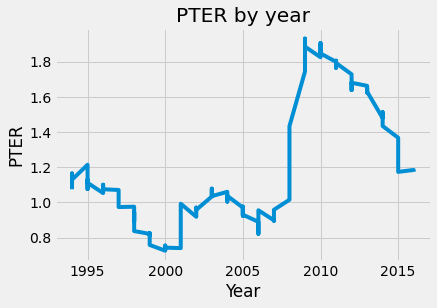

In [68]:
year = pd.DatetimeIndex(unemployment['Date']).year
pter_over_time = unemployment
pter_over_time["Year"] = year
pter_over_time

plt.plot(pter_over_time["Year"], pter_over_time["PTER"])
plt.title("PTER by year")
plt.xlabel('Year')
plt.ylabel("PTER")
plt.show()

**Question 7:** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to True if you think PTER rates were high in this period, and False if you think they weren't.

In [69]:
highPTER = True

# 4. Scatter Plots 

A **scatter plot** depicts the relationship between two variables on a rectangular coordinate system, where each axis corresponds to one variable. Scatter plots are used for both quantitative and categorical data.

**NOTE:** Helpful rerefence: https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html

We'll use the scatter plot for quantitative data right now.

The data set we'll use is the titanic.

In [70]:
titanic = pd.read_csv("titanic.csv")
print(titanic.shape)
print(titanic.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Let's create a scatter plot compare the 'Age' of a passenger to their 'Fare.'

We'll begin by creating a subtable with the columns 'Age' and 'Fare.'

In [71]:
age_fare_table = titanic.filter(items = ['Age', 'Fare'])

age_fare_table

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


Notice that some of the rows have null or **NaN** values. There are two things we can do when dealing with these values:
    
   1) Replace the NaN values with a value using the **`.isna()`**
    
   2) Drop the rows that have them using **`.dropna()`**
    
We'll be doing the latter first.

In [72]:
age_fare_table = age_fare_table.dropna()
age_fare_table

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


Now let's get to scattering. 

First, store each column in an array.

Next, scatter the values

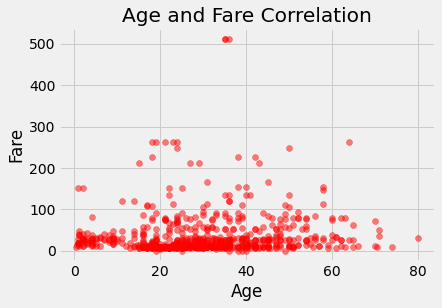

In [73]:
age = age_fare_table['Age'].values
fare= age_fare_table['Fare'].values

plt.scatter(age, fare, c='red', alpha=0.5)
plt.title('Age and Fare Correlation')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**Question:** Take a look at the original table columns. Is there a better column we can compare the 'Fare' with ? Is there a better column we can compare the 'Age' with ? Explain why or why not below.

In [74]:
explanation3 = """We can compare the Fare with the Cabin and PClass columns to see the correlation between prices and 
                these luxuries. We can also compare Age with Survived to gain insights into age groups that were 
                better disposed to surviving the event. """
explanation3

'We can compare the Fare with the Cabin and PClass columns to see the correlation between prices and \n                these luxuries. We can also compare Age with Survived to gain insights into age groups that were \n                better disposed to surviving the event. '

**Question:** Find the average age of the 'Age' column in the first `age_fare_table` (the one with NaN values). Using the **`.isna()`** function, fill the `age_fare_table` **NaN** values with the average age of the 'Age' column. Finally, created a scatter plot based on filled table.

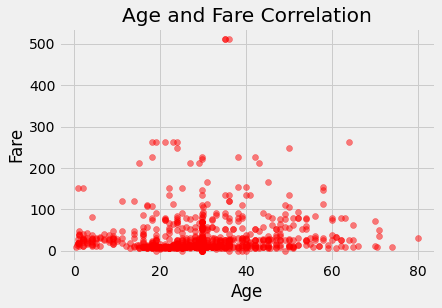

In [75]:
original_age_fare_table = titanic.filter(items = ['Age', 'Fare'])
average_age = original_age_fare_table["Age"].mean()
invalid_ages = original_age_fare_table["Age"].isna()
current_ages = original_age_fare_table["Age"]

for index in range(len(current_ages)):
    if invalid_ages[index]:
        current_ages[index] = average_age

original_age_fare_table["Age"] = current_ages
age = original_age_fare_table['Age'].values
fare= original_age_fare_table['Fare'].values

plt.scatter(age, fare, c='red', alpha=0.5)
plt.title('Age and Fare Correlation')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()